# Predicting heart diseases using ML 

We're going to take following approach:

1. Problem defination
2. Data
3. EValuation
4. Features
5. Modelling
6. Evaluation and Experimentation

## 1. Problem Defination
> Given, clinical parameters of a patient's health, can we find whether or not they have heart diseases?

# 2.Data 

> Attributes

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## 3. Evaluation


> If we can reach 95% accuracy at predicting whether or  not a patient has heart 
dseases during proof of concept, we'll pursue the project.

# 4. Features

This is where you get different information about each of the features in your data.

**Create data Dictionary**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model Evaluations
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

## Exploring our data

1. What questions are you trying to solve?
2. What kind of daata do we have and how to deal with it?
3. what's missing and how to dela with it?
4. Where are the outliners and why should you care about them?
5. How can you add, change or rename features to get more out of your data?


In [2]:
df  = pd.read_csv("heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Now that's a balanced classification problem,

Let's try and visualize the data

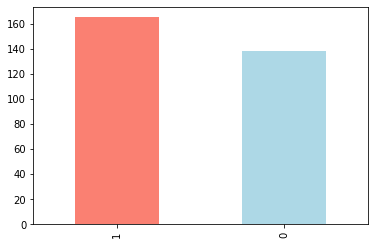

In [6]:
df.target.value_counts().plot(kind="bar",color= ["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


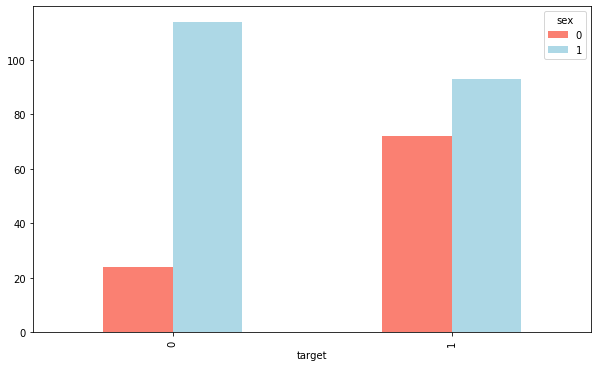

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

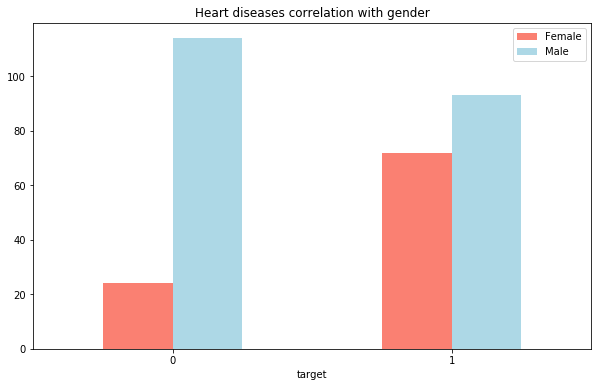

In [13]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

plt.title("Heart diseases correlation with gender")
plt.xlabel=("0 = No Diseases,1 = Disease")
plt.ylabel=("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0);


In [14]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

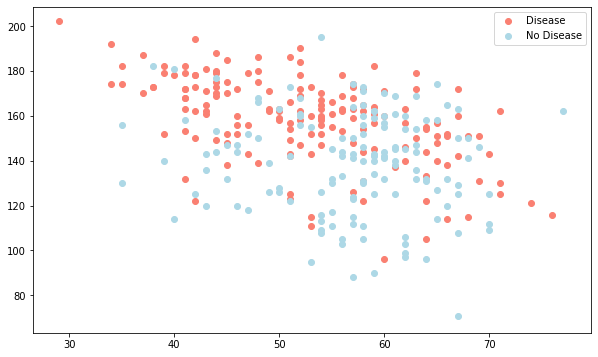

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target==1],
           c= "salmon")

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="lightblue")

plt.title="Age VS max heart rate"
plt.xlabel = "Age"
plt.ylabel = "Max heart rate"
plt.legend(["Disease","No Disease"])


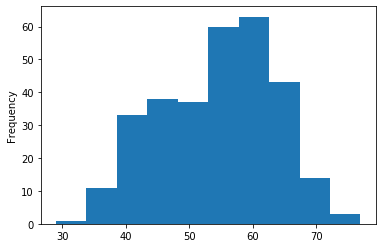

In [16]:
df.age.plot.hist();

AttributeError: module 'matplotlib.pyplot' has no attribute 'Title'

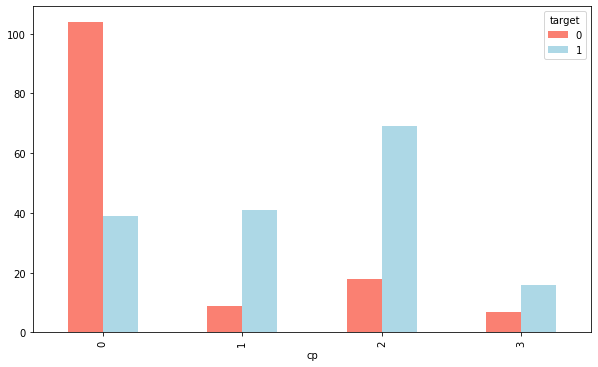

In [17]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                 color=["salmon","lightblue"])

plt.Title("HErat Diseases Frequency Per Chest PAin Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Intensity")

## Correlation MAtrix

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


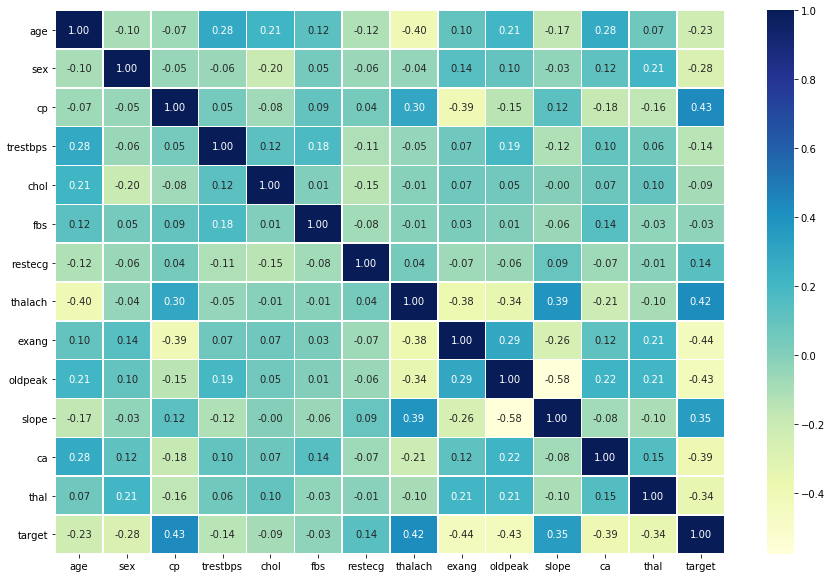

In [19]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modelling

In [ ]:
df.head()

In [20]:
X = df.drop("target",axis = 1)
y = df.target

np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

Time to build machine learning model

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score_models(models,X_train,X_test,y_train,y_test): 
    np.random.seed(42)

    scores = {}

    for name,model in models.items():
        model.fit(X_train,y_train)

        scores[name] = model.score(X_test,y_test)
    return scores 

In [ ]:
scores = fit_and_score_models(models,X_train,X_test,y_train,y_test)
scores

## Model Comparision

In [22]:
model_compare = pd.DataFrame(scores,index = ["accuracy"])
model_compare.T.plot.bar();

NameError: name 'scores' is not defined

In [23]:
np.random.seed(42)
log_reg_gris = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split" : np.arange(2,20,2)}
#           "min_samples_lead": np.arange(1,20,2)}
model = {"logosticregression" : LogisticRegression() ,
         "Random Forest" : RandomForestClassifier()}

lr = GridSearchCV(model["logosticregression"],log_reg_gris)
lr = RandomizedSearchCV(model["Random Forest"],rf_grid,cv=5,verbose=True)

lr.fit(X_train,y_train)
    
lr.score(X_train,y_train)
lr.score(X_test,y_test)
# train_scores


NameError: name 'RandomizedSearchCV' is not defined

In [24]:
plt.plot(C,train_scores,label="train scores")
plt.plot(C,test_scores,label="test scores")

NameError: name 'C' is not defined

We eliminated 
knn by hand
random forest by random search cv

now let's use grid search cv to tune our logistic regression model


In [25]:
np.random.seed(42)
log_reg_gris = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

lr = GridSearchCV(LogisticRegression(),
                  param_grid = log_reg_gris,
                 cv=5,
                 verbose = True)


lr.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [26]:
lr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [27]:
lr.score(X_test,y_test)

0.8852459016393442

In [28]:
y_preds= lr.predict(X_test)
y_preds_positive = lr.predict_proba(X_test)[:,1]
y_preds_positive

array([0.13274726, 0.75591495, 0.81452422, 0.05469223, 0.88453356,
       0.87070297, 0.60512178, 0.00435981, 0.01376377, 0.56138458,
       0.71720802, 0.11904144, 0.88730101, 0.06005038, 0.9675006 ,
       0.93181123, 0.96404702, 0.09452761, 0.01769764, 0.02646362,
       0.71543138, 0.02727602, 0.14274672, 0.716608  , 0.88198278,
       0.69480591, 0.84234232, 0.69335557, 0.01830938, 0.8778237 ,
       0.0715076 , 0.06684154, 0.01510285, 0.14314492, 0.6022949 ,
       0.12640329, 0.6633502 , 0.85079082, 0.81898324, 0.84121546,
       0.54515819, 0.79250828, 0.7781759 , 0.70538843, 0.83243213,
       0.02112999, 0.73216372, 0.93234387, 0.10276675, 0.06440751,
       0.1347065 , 0.03554557, 0.8044197 , 0.95312793, 0.31714638,
       0.00309601, 0.0873472 , 0.93823574, 0.028138  , 0.01309874,
       0.06291751])

In [29]:
from sklearn.metrics import roc_curve
frp,trp,thresholds = roc_curve(y_test,y_preds_positive) 

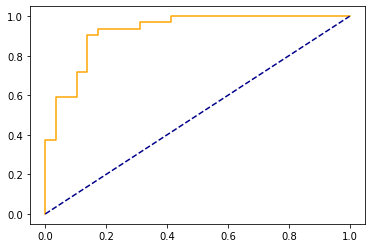

In [30]:
plt.plot(frp,trp,color="orange",label="ROC")
plt.plot([0,1],[0,1],color = "darkblue",linestyle = "--",label="Guessing")

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_preds_positive)

0.925646551724138

In [32]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [33]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [34]:
from sklearn.metrics import recall_score,accuracy_score,f1_score
print(precision_score(y_test,y_preds),
recall_score(y_test,y_preds),
f1_score(y_test,y_preds))

0.8787878787878788 0.90625 0.8923076923076922


## Using cross validation

In [35]:
np.mean(cross_val_score(lr,X,y,cv=5))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


0.8413661202185793

In [36]:
lr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

Accuracy

In [37]:
acc = np.mean(cross_val_score(lr,X,y,cv=5,verbose=False))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


Precision

In [38]:
pricision = np.mean(cross_val_score(lr,X,y,cv=5,scoring="precision"))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


In [39]:
recall = cross_val_score(lr,X,y,scoring="recall")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


In [40]:
f1 = np.mean(cross_val_score(lr,X,y,scoring="f1"))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


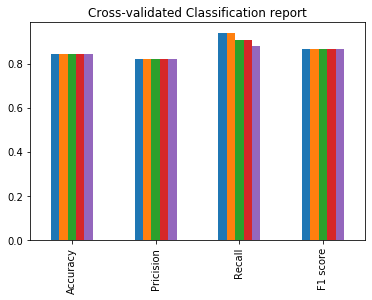

In [41]:
evaluate = pd.DataFrame({"Accuracy":acc,
              "Pricision" : pricision,
              "Recall" : recall,
              "F1 score" : f1})
evaluate.T.plot.bar(title="Cross-validated Classification report",legend = False)

## FEATURE IMPORTANCE

In [44]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [46]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8852459016393442

In [47]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [48]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

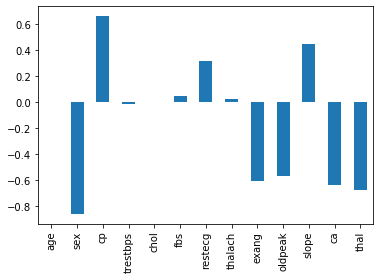

In [52]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(legend=False);